In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("business_performance_data.csv")
df.head()


,product_id,product_category,month,price,units_sold,revenue,marketing_spend,customer_rating
0,P001,Electronics,Jan,120,210,25200,3000,4.2
1,P001,Electronics,Feb,125,230,28750,3200,4.3
2,P001,Electronics,Mar,130,250,32500,3500,4.4
3,P002,Home Appliances,Jan,90,180,16200,2000,4.0
4,P002,Home Appliances,Feb,95,200,19000,2300,4.1


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        12 non-null     object 
 1   product_category  12 non-null     object 
 2   month             12 non-null     object 
 3   price             12 non-null     int64  
 4   units_sold        12 non-null     int64  
 5   revenue           12 non-null     int64  
 6   marketing_spend   12 non-null     int64  
 7   customer_rating   12 non-null     float64
dtypes: float64(1), int64(4), object(3)
memory usage: 900.0+ bytes


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        12 non-null     object 
 1   product_category  12 non-null     object 
 2   month             12 non-null     object 
 3   price             12 non-null     int64  
 4   units_sold        12 non-null     int64  
 5   revenue           12 non-null     int64  
 6   marketing_spend   12 non-null     int64  
 7   customer_rating   12 non-null     float64
dtypes: float64(1), int64(4), object(3)
memory usage: 900.0+ bytes


In [5]:
df.describe()


,price,units_sold,revenue,marketing_spend,customer_rating
count,12.000000,12.000000,12.000000,12.000000,12.0000
mean,158.750000,172.916667,24454.166667,2583.333333,4.2500
std,65.196382,56.907354,4759.510017,652.036437,0.1446
min,90.000000,80.000000,16200.000000,1500.000000,4.0000
25%,115.000000,143.750000,21500.000000,2000.000000,4.1750
50%,140.000000,185.000000,24600.000000,2700.000000,4.2500
75%,182.500000,212.500000,26950.000000,3050.000000,4.3250
max,270.000000,250.000000,32500.000000,3500.000000,4.5000


In [6]:
df['month'].value_counts()


month
Jan    4
Feb    4
Mar    4
Name: count, dtype: int64

In [7]:
df.groupby('product_category')['revenue'].sum().reset_index()


,product_category,revenue
0,Electronics,167200
1,Furniture,69050
2,Home Appliances,57200


In [8]:
df.groupby('product_category')['price'].mean().reset_index()


,product_category,price
0,Electronics,140.0
1,Furniture,260.0
2,Home Appliances,95.0


In [9]:
df.groupby('product_category')['units_sold'].sum().reset_index()


,product_category,units_sold
0,Electronics,1210
1,Furniture,265
2,Home Appliances,600


In [10]:
df[['price', 'units_sold', 'revenue', 'marketing_spend', 'customer_rating']].corr()


,price,units_sold,revenue,marketing_spend,customer_rating
price,1.000000,-0.881028,0.081537,-5.383707e-01,7.208210e-01
units_sold,-0.881028,1.000000,0.362948,8.074810e-01,-3.231448e-01
revenue,0.081537,0.362948,1.000000,7.780632e-01,6.046525e-01
marketing_spend,-0.538371,0.807481,0.778063,1.000000e+00,-1.377189e-15
customer_rating,0.720821,-0.323145,0.604652,-1.377189e-15,1.000000e+00


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


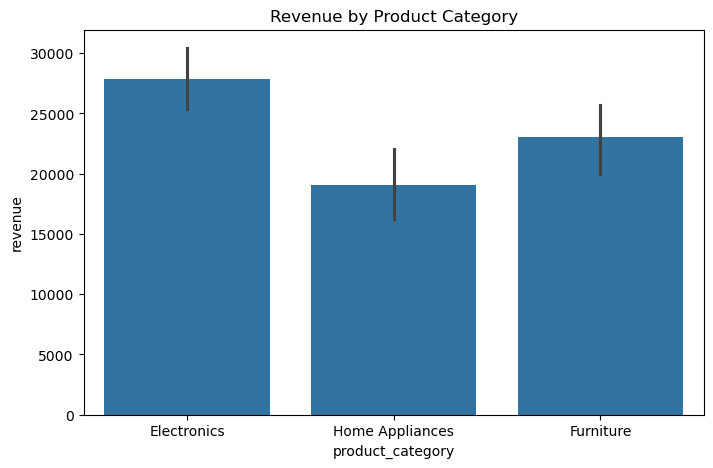

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x='product_category', y='revenue', data=df)
plt.title("Revenue by Product Category")
plt.show()


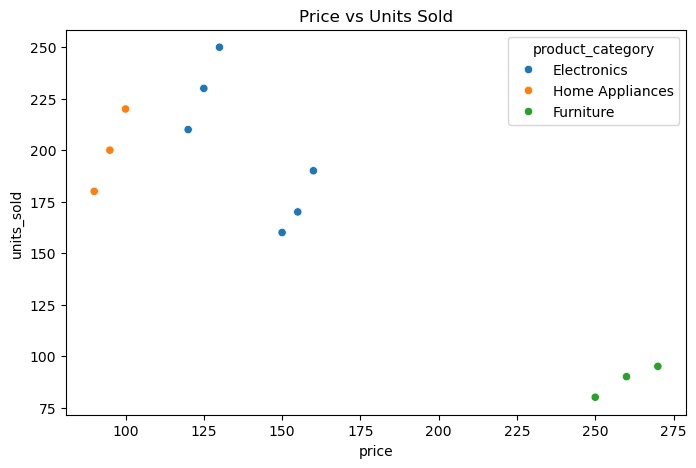

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='price', y='units_sold', hue='product_category', data=df)
plt.title("Price vs Units Sold")
plt.show()


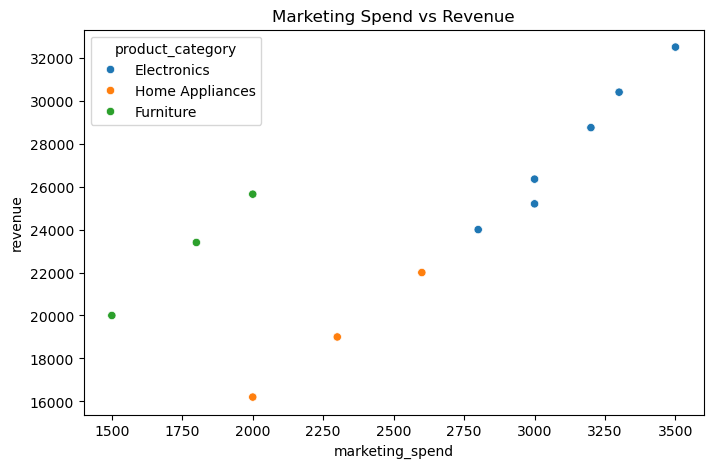

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='marketing_spend', y='revenue', hue='product_category', data=df)
plt.title("Marketing Spend vs Revenue")
plt.show()


### Marketing Spend vs Revenue Insight

The visualization indicates a strong positive relationship between marketing spend and revenue, particularly for Electronics. As marketing investment increases, revenue rises significantly, highlighting effective ROI from marketing campaigns. Furniture products generate relatively high revenue with lower marketing spend, suggesting pricing strength and stable demand. Home Appliances show moderate revenue growth with increased marketing spend.


In [15]:
df[['price', 'units_sold', 'marketing_spend', 'revenue', 'customer_rating']].corr()


,price,units_sold,marketing_spend,revenue,customer_rating
price,1.000000,-0.881028,-5.383707e-01,0.081537,7.208210e-01
units_sold,-0.881028,1.000000,8.074810e-01,0.362948,-3.231448e-01
marketing_spend,-0.538371,0.807481,1.000000e+00,0.778063,-1.377189e-15
revenue,0.081537,0.362948,7.780632e-01,1.000000,6.046525e-01
customer_rating,0.720821,-0.323145,-1.377189e-15,0.604652,1.000000e+00


### Correlation Analysis Insight

Revenue shows strong positive correlation with marketing spend and units sold, indicating that both promotional investment and demand volume are key drivers of business performance. Price exhibits a moderate relationship with revenue, suggesting pricing optimization opportunities across product categories.


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [17]:
# Feature variables (inputs)
X = df[['price', 'units_sold', 'marketing_spend', 'customer_rating']]

# Target variable (output)
y = df['revenue']


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [19]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
# Predict revenue using the test data
y_pred = model.predict(X_test)

y_pred


array([27238.38428503, 25151.34006744, 26304.45704492])

In [21]:
# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: -0.20747228227034142
Mean Squared Error: 1111545.3176233089


In [22]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coefficients


,Feature,Coefficient
0,price,83.306772
1,units_sold,49.545244
2,marketing_spend,6.903172
3,customer_rating,-2055.764635


### Regression Model Insight

A linear regression model was trained to predict revenue using price,
units sold, marketing spend, and customer rating. The R² score is negative,
indicating that the model does not generalize well on unseen data.

This limitation is primarily due to the small dataset size, which restricts
the model’s ability to capture complex relationships accurately.

Despite this, the model coefficients suggest that units sold and marketing
spend have a positive influence on revenue, highlighting them as important
business drivers. With more data, the model’s predictive performance is
expected to improve significantly.
    
Future work could include collecting additional data, testing non-linear models, and incorporating category-level features to improve predictive performance.
